In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, diffx_tv, diffx_uq, diffy_vq, diffy_tu, filter_apply, filter_iteration, compute_isotropic_KE
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [36]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/trace', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky', additional_subfolder='output')

In [37]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'EXP205-full',
 'EXP205-trace-free',
 'EXP205-trace-only',
 'ZB-full',
 'ZB-ssd-full',
 'ZB-ssd-trace-free',
 'ZB-ssd-trace-only',
 'ZB-trace-free',
 'ZB-trace-only',
 'momf-full',
 'momf-trace-free',
 'momf-trace-only',
 'Cs-0.001',
 'Cs-0.002',
 'Cs-0.005',
 'Cs-0.01',
 'Cs-0.02',
 'Cs-0.03',
 'Cs-0.04',
 'Cs-0.05',
 'Cs-0.06',
 'Cs-0.06-new-bin',
 'Cs-0.06-new-bin-and-MOM_override',
 'Cs-0.06-repeat',
 'Cs-0.07',
 'Cs-0.08',
 'Cs-0.09',
 'Cs-0.1']

In [38]:
ds.remesh('R64','R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


In [46]:
def plot_ssh(model='EXP205'):
    default_rcParams({'font.size':18})
    #ds.plot_ssh(['R4', 'R64_R4'], labels=['$1/4^o$', 'Reference'])
    err0 = str(round(Lk_error(ds['Cs-0.03'].ssh_mean, ds['R64_R4'].ssh_mean, normalize=False)[0],3))
    err1 = str(round(Lk_error(ds[f'{model}-full'].ssh_mean, ds['R64_R4'].ssh_mean, normalize=False)[0],3))
    err2 = str(round(Lk_error(ds[f'{model}-trace-free'].ssh_mean, ds['R64_R4'].ssh_mean, normalize=False)[0],3))
    err3 = str(round(Lk_error(ds[f'{model}-trace-only'].ssh_mean, ds['R64_R4'].ssh_mean, normalize=False)[0],3))
    ds.plot_ssh([f'{model}-full', f'{model}-trace-free', f'{model}-trace-only'],labels=[f'Full model \n L2 error={err1}',f'Trace-free \n L2 error={err2}', f'Trace-only \n L2 error={err3}'])
    plt.suptitle(f'Model {model}. Bare L2 error={err0}', y=1.05)

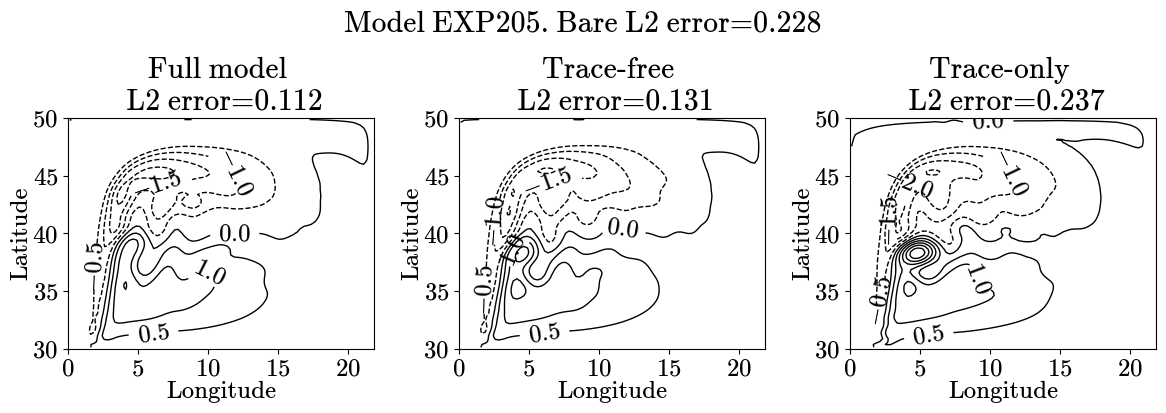

In [47]:
plot_ssh()

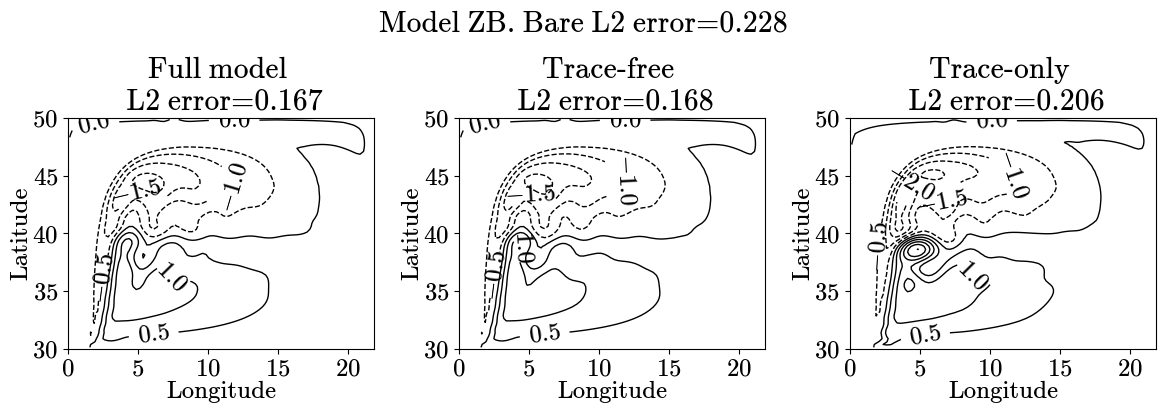

In [48]:
plot_ssh('ZB')

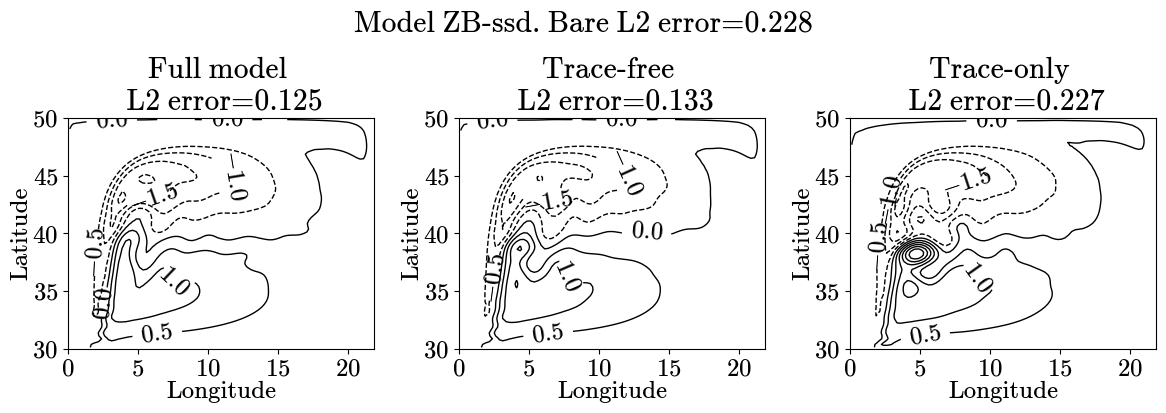

In [49]:
plot_ssh('ZB-ssd')

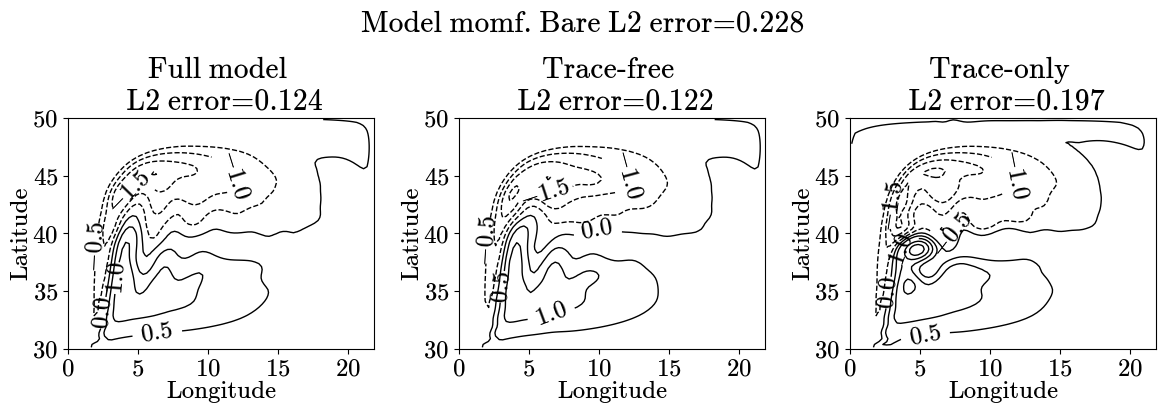

In [50]:
plot_ssh('momf')

In [56]:
def plot_KE_PE(model='EXP205'):
    ds.plot_KE_PE(['Cs-0.03', f'{model}-trace-only', f'{model}-full', f'{model}-trace-free','R64_R4'],labels=['$1/4^o$','trace-only', 'full model','trace-free', 'Reference'])
    plt.suptitle(f'Model {model}')


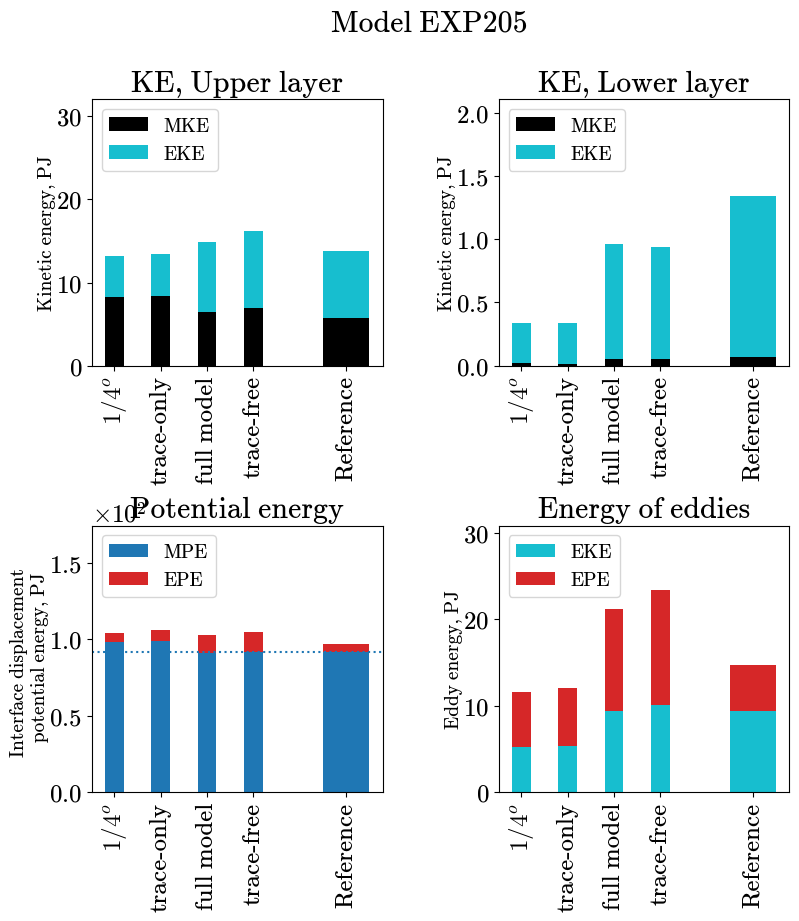

In [57]:
plot_KE_PE()

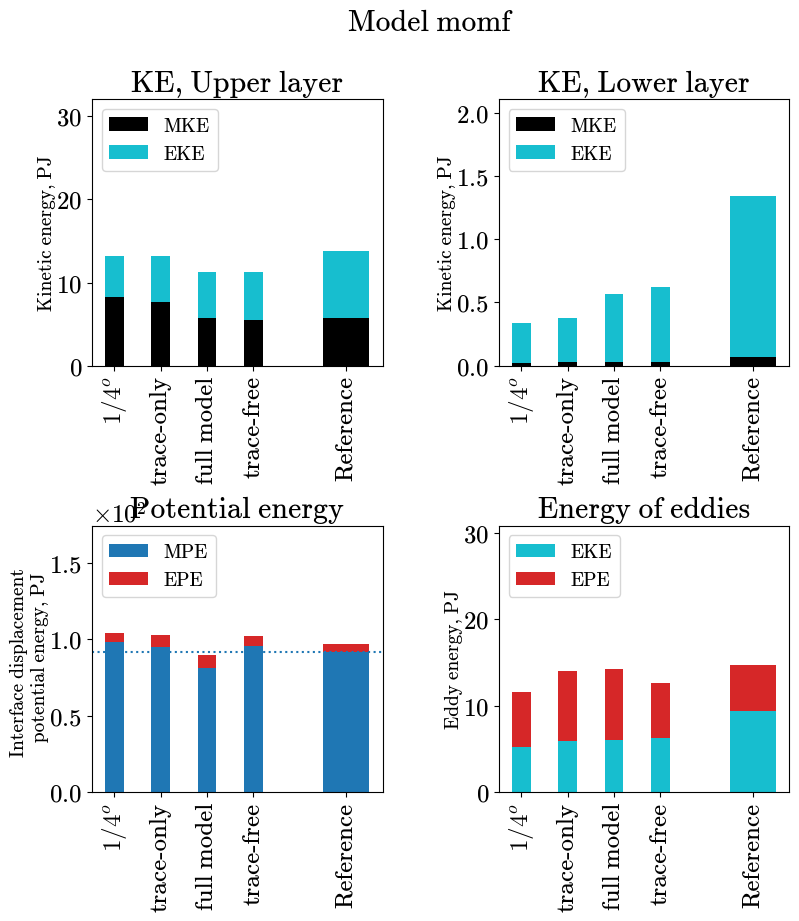

In [58]:
plot_KE_PE('momf')

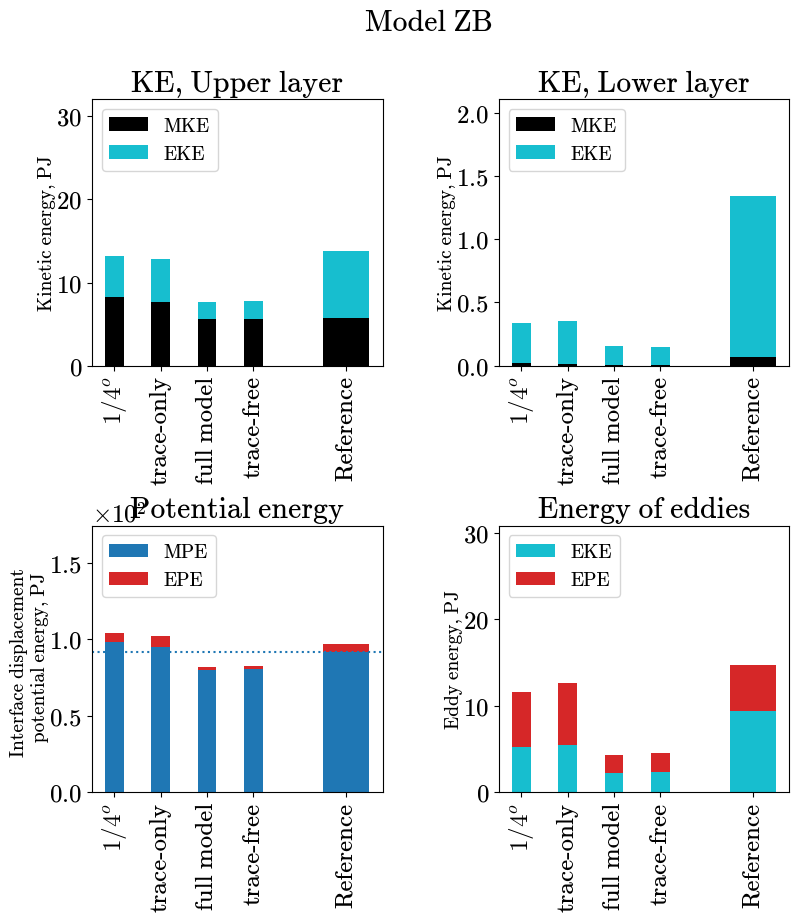

In [59]:
plot_KE_PE('ZB')

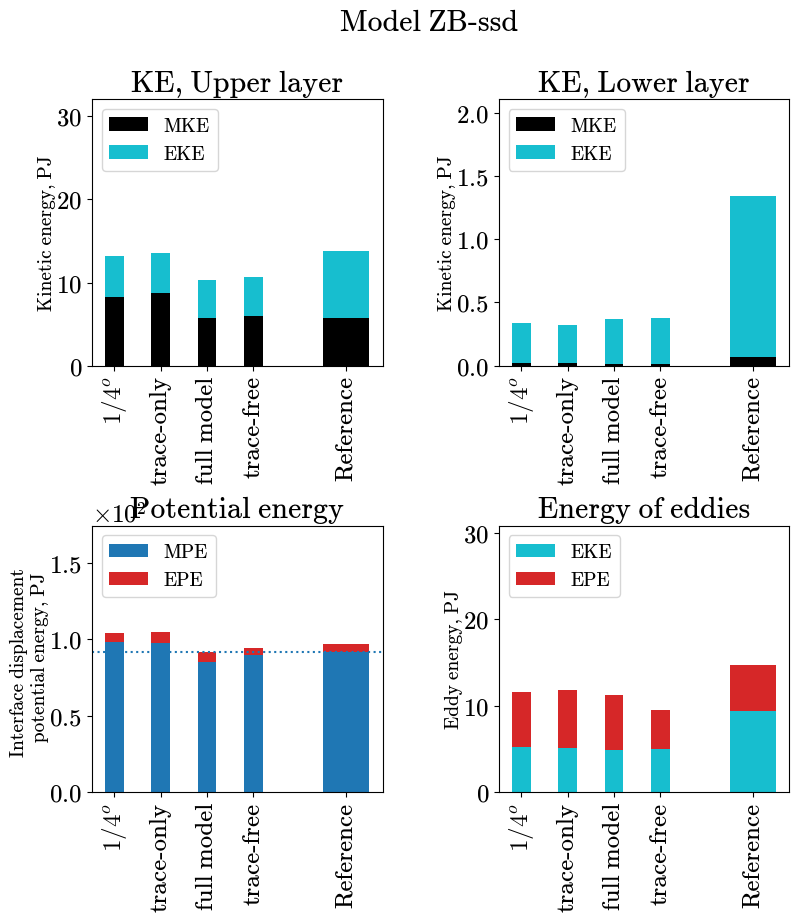

In [60]:
plot_KE_PE('ZB-ssd')

In [61]:
def plot_EKE_spectrum(model='EXP205'):
    ds.plot_KE_spectrum(['Cs-0.03', f'{model}-trace-only', f'{model}-full', f'{model}-trace-free','R64_R4'],labels=['$1/4^o$','trace-only', 'full model','trace-free', 'Reference'])
    plt.suptitle(f'Model {model}')

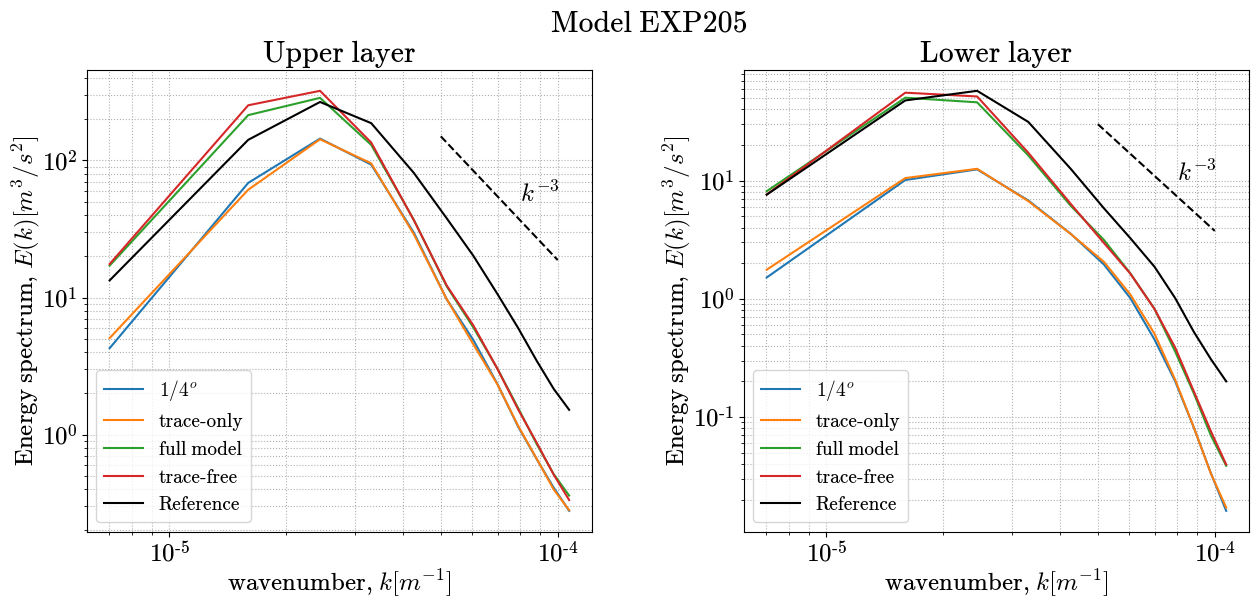

In [62]:
plot_EKE_spectrum()

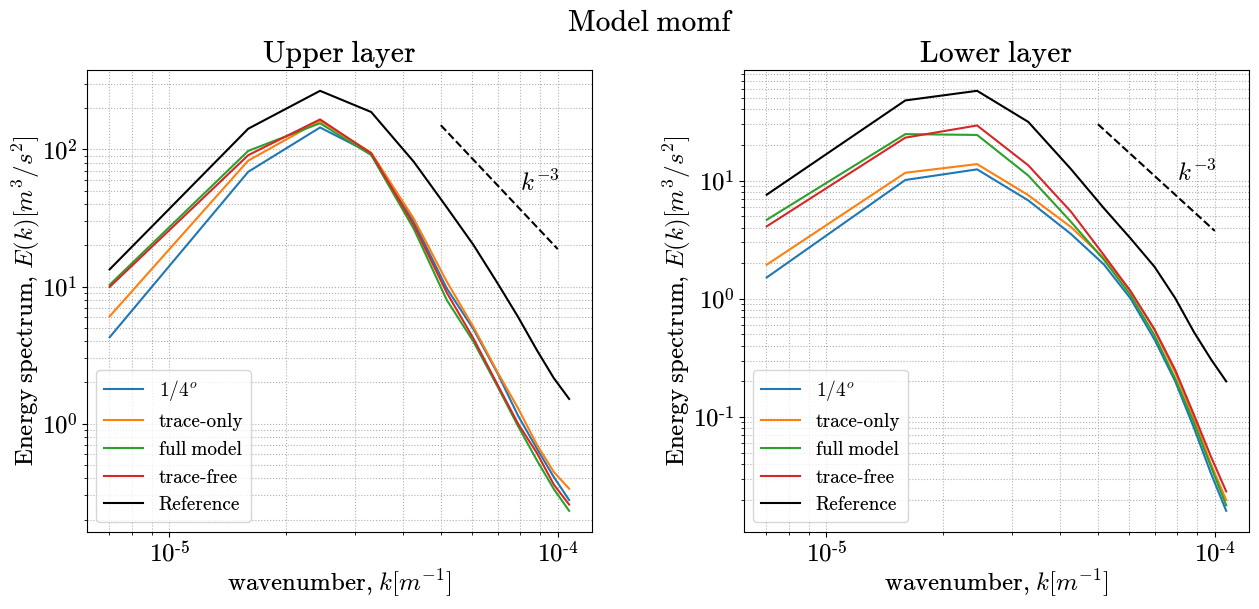

In [63]:
plot_EKE_spectrum('momf')

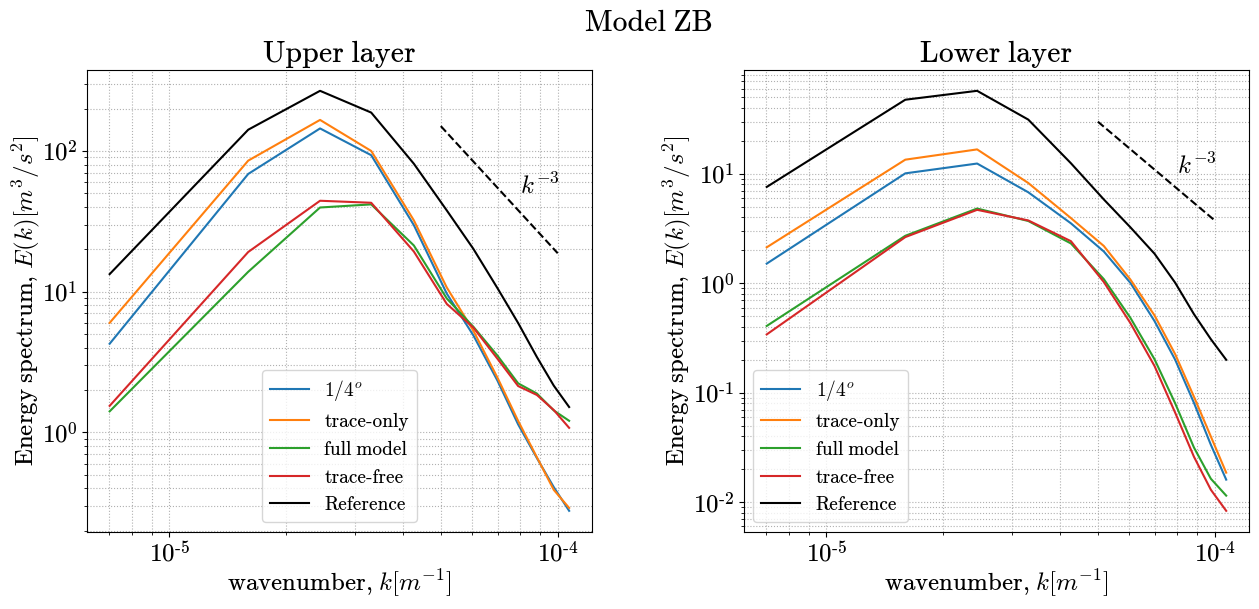

In [64]:
plot_EKE_spectrum('ZB')

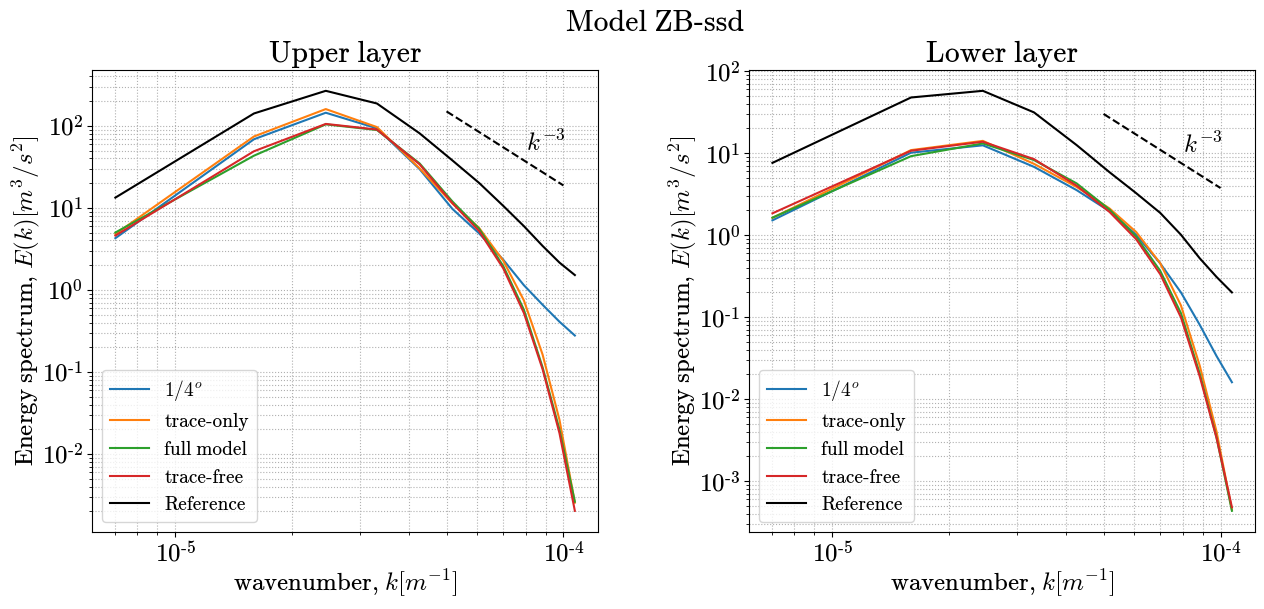

In [65]:
plot_EKE_spectrum('ZB-ssd')